# Problem 1

In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

### Generate signals and matrices

In [3]:
def gen_linear_signal(size = 100, x_0 = None):
    a = np.random.randn()
    if x_0 == None:
        x_0 = np.random.randn()
    return x_0 + np.linspace(0, 1 - 1/size, size)*a

In [4]:
def gen_quadratic_signal(size = 100, x_0 = None):
    a = np.random.randn()
    b = np.random.randn()
    if x_0 == None:
        x_0 = np.random.randn()
    x = np.linspace(0, 1 - 1/size, size)
    return x_0 + (x**2)*a + x*b

In [5]:
x_0 = 0
signal_1 = np.zeros(1000)
for i in range(10):
    signal_1[i*100 : (i+1)*100] = gen_linear_signal(x_0 = x_0)
    x_0 = signal_1[(i+1)*100 - 1]
signal_1 -= signal_1.mean()

In [6]:
signal_2 = np.zeros(1000)
for i in range(10):
    signal_2[i*100 : (i+1)*100] = gen_linear_signal()
signal_2 -= signal_2.mean()

In [7]:
x_0 = 0
signal_3 = np.zeros(1000)
for i in range(10):
    signal_3[i*100 : (i+1)*100] = gen_quadratic_signal(x_0 = x_0)
    x_0 = signal_3[(i+1)*100 - 1]
signal_3 -= signal_3.mean()

In [8]:
from scipy.sparse import diags

In [9]:
D1 = diags([1, -1], offsets = [0, 1], shape = (999, 1000)).toarray()
D2 = diags([1, -2, 1], offsets = [0, 1, 2], shape = (998, 1000)).toarray()

In [10]:
for signal in [signal_1, signal_2, signal_3]:
    noise = np.random.uniform(low = -0.2, high = 0.2, size = 1000) + 0.2*np.random.randn(1000)
    signal += noise 

### Signals

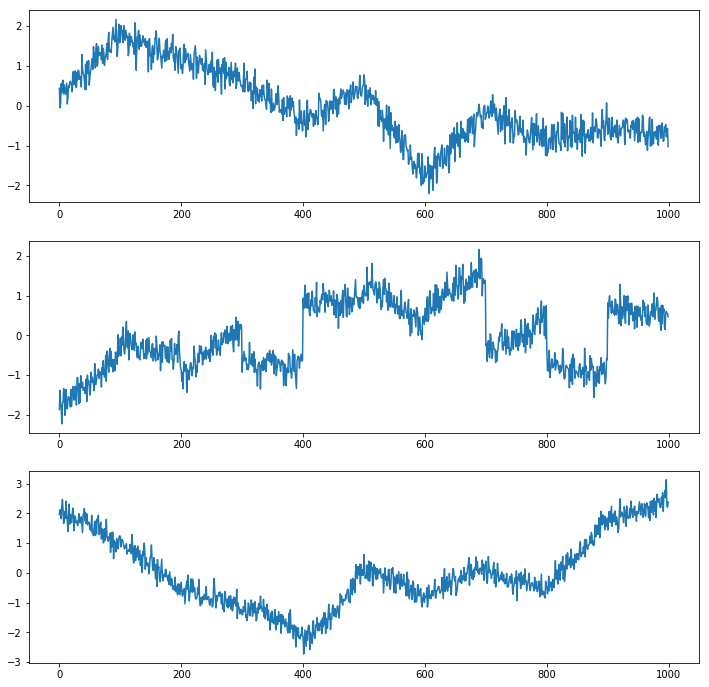

In [11]:
_, axes = plt.subplots(3, 1, figsize=(12, 12))
axes[0].plot(signal_1)
axes[1].plot(signal_2)
axes[2].plot(signal_3)

Quadratic signal looks much like linear, let's try qubic spline instead

In [12]:
from scipy.interpolate import CubicSpline

def gen_qubic_spline_signal(x_0, size = 100):
    x = np.linspace(0, 1 - 1/size, 3)
    y = np.random.randn(3)
    y[0] = x_0
    cs = CubicSpline(x, y, bc_type = 'clamped')
    return cs(np.linspace(0, 1 - 1/size, size))

In [13]:
x_0 = 0
signal_3 = np.zeros(1000)
for i in range(10):
    signal_3[i*100 : (i+1)*100] = gen_qubic_spline_signal(x_0 = x_0)
    x_0 = signal_3[(i+1)*100 - 1]
signal_3 -= signal_3.mean()

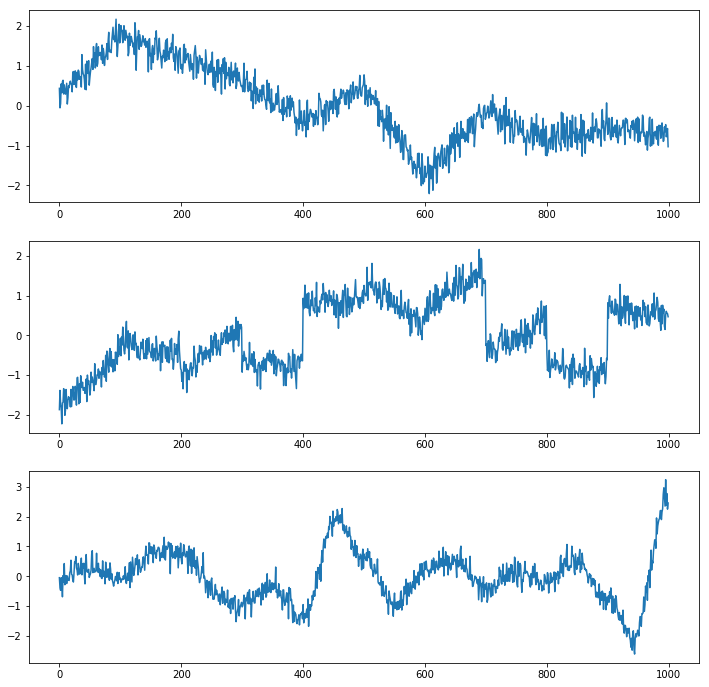

In [14]:
noise = np.random.uniform(low = -0.2, high = 0.2, size = 1000) + 0.2*np.random.randn(1000)
signal_3 += noise 
    
_, axes = plt.subplots(3, 1, figsize=(12, 12))
axes[0].plot(signal_1)
axes[1].plot(signal_2)
axes[2].plot(signal_3)

### Restore signals

For each signal there are plots:
- corrupted signal (gaussian + uniform noise)
- restored signal with $\gamma\|D_1y\|_2, \ \gamma = 1$ penalty
- restored signal with $\gamma\|D_1y\|_1, \ \gamma = 1$ penalty
- restored signal with $\gamma\|D_2y\|_1, \ \gamma = 1$ penalty

#### Signal_1

In [15]:
y_1 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_1 - signal_1) + cvx.norm2(D1*y_1)))
p.solve()
y_1 = y_1.value

y_2 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_2 - signal_1) + cvx.norm1(D1*y_2)))
p.solve()
y_2 = y_2.value

y_3 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_3 - signal_1) + cvx.norm1(D2*y_3)))
p.solve()
y_3 = y_3.value

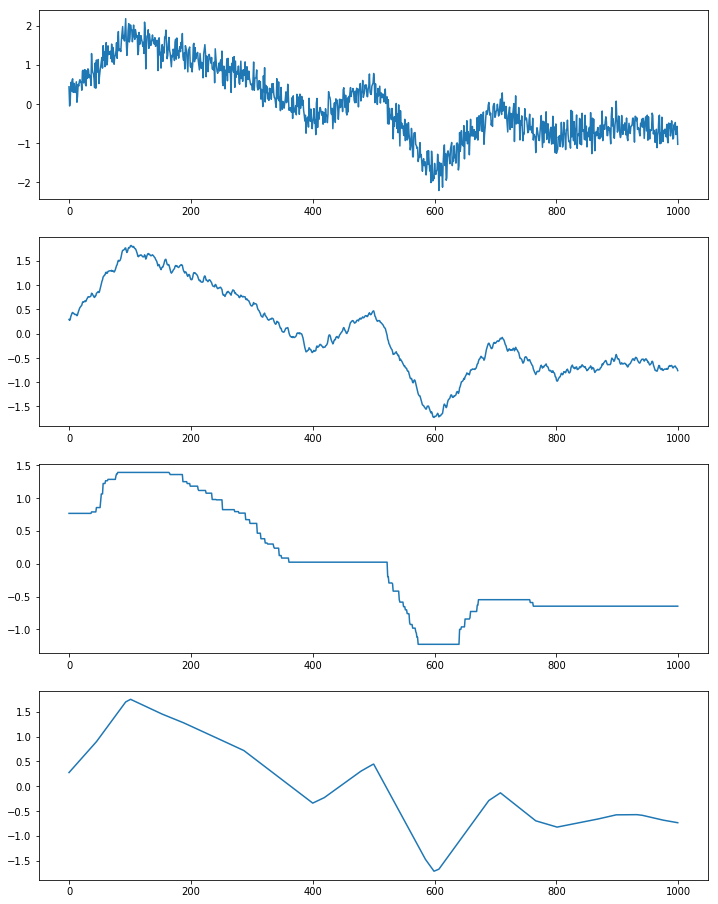

In [16]:
_, axes = plt.subplots(4, 1, figsize=(12, 16))
axes[0].plot(signal_1)
axes[1].plot(y_1)
axes[2].plot(y_2)
axes[3].plot(y_3)

#### Signal_2

In [17]:
y_1 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_1 - signal_2) + cvx.norm2(D1*y_1)))
p.solve()
y_1 = y_1.value

y_2 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_2 - signal_2) + cvx.norm1(D1*y_2)))
p.solve()
y_2 = y_2.value

y_3 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_3 - signal_2) + cvx.norm1(D2*y_3)))
p.solve()
y_3 = y_3.value

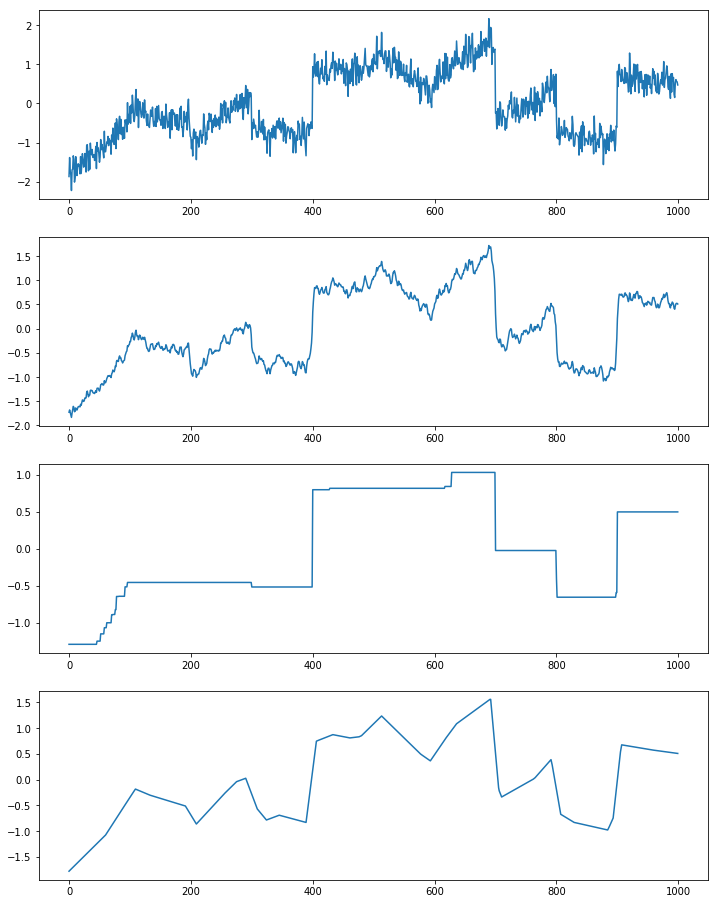

In [18]:
_, axes = plt.subplots(4, 1, figsize=(12, 16))
axes[0].plot(signal_2)
axes[1].plot(y_1)
axes[2].plot(y_2)
axes[3].plot(y_3)

#### Signal_3

In [19]:
y_1 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_1 - signal_3) + cvx.norm2(D1*y_1)))
p.solve()
y_1 = y_1.value

y_2 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_2 - signal_3) + cvx.norm1(D1*y_2)))
p.solve()
y_2 = y_2.value

y_3 = cvx.Variable(1000)
p = cvx.Problem(cvx.Minimize(cvx.norm2(y_3 - signal_3) + cvx.norm1(D2*y_3)))
p.solve()
y_3 = y_3.value

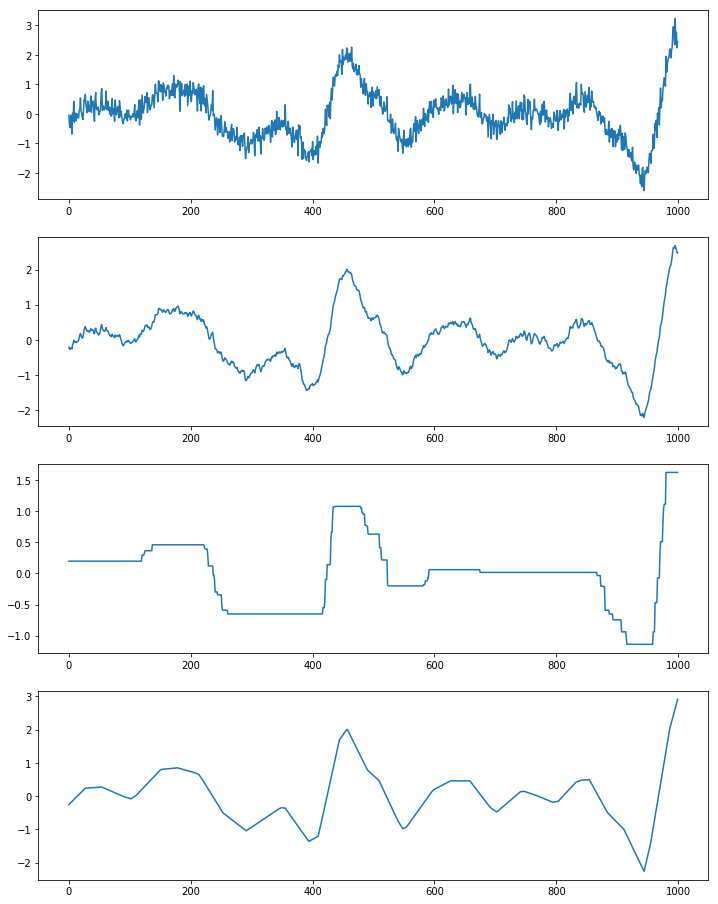

In [20]:
_, axes = plt.subplots(4, 1, figsize=(12, 16))
axes[0].plot(signal_3)
axes[1].plot(y_1)
axes[2].plot(y_2)
axes[3].plot(y_3)

## $\gamma$ choice

### Signal_1

In [21]:
gamma = np.logspace(-2, 1, 20)
signal = signal_1

#### $\|D_1y\|_2$

In [22]:
y = cvx.Variable(1000)
res = cvx.norm2(y - signal)

reg = cvx.norm2(D1*y)
reg_d1_2 = []
res_d1_2 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d1_2.append(reg.value)
    res_d1_2.append(res.value)
    
reg = cvx.norm1(D1*y)
reg_d1_1 = []
res_d1_1 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d1_1.append(reg.value)
    res_d1_1.append(res.value)
    
reg = cvx.norm1(D2*y)
reg_d2_1 = []
res_d2_1 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d2_1.append(reg.value)
    res_d2_1.append(res.value)

Text(0.5, 0, 'residual')

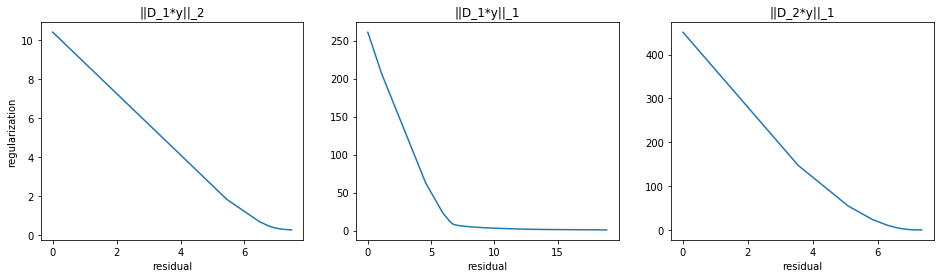

In [23]:
_, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].plot(res_d1_2, reg_d1_2)
axes[0].set_title('||D_1*y||_2')
axes[0].set_ylabel('regularization')
axes[0].set_xlabel('residual')
axes[1].plot(res_d1_1, reg_d1_1)
axes[1].set_title('||D_1*y||_1')
axes[1].set_xlabel('residual')
axes[2].plot(res_d2_1, reg_d2_1)
axes[2].set_title('||D_2*y||_1')
axes[2].set_xlabel('residual')

### Signal_2

In [24]:
signal = signal_2
y = cvx.Variable(1000)
res = cvx.norm2(y - signal)

reg = cvx.norm2(D1*y)
reg_d1_2 = []
res_d1_2 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d1_2.append(reg.value)
    res_d1_2.append(res.value)
    
reg = cvx.norm1(D1*y)
reg_d1_1 = []
res_d1_1 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d1_1.append(reg.value)
    res_d1_1.append(res.value)
    
reg = cvx.norm1(D2*y)
reg_d2_1 = []
res_d2_1 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d2_1.append(reg.value)
    res_d2_1.append(res.value)

Text(0.5, 0, 'residual')

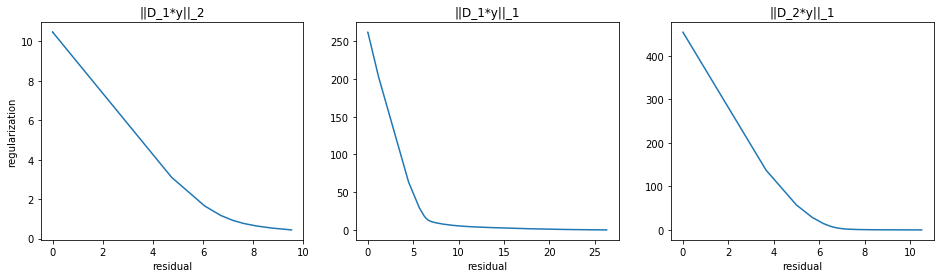

In [25]:
_, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].plot(res_d1_2, reg_d1_2)
axes[0].set_title('||D_1*y||_2')
axes[0].set_ylabel('regularization')
axes[0].set_xlabel('residual')
axes[1].plot(res_d1_1, reg_d1_1)
axes[1].set_title('||D_1*y||_1')
axes[1].set_xlabel('residual')
axes[2].plot(res_d2_1, reg_d2_1)
axes[2].set_title('||D_2*y||_1')
axes[2].set_xlabel('residual')

### Signal_3

In [26]:
signal = signal_3
gamma = np.logspace(-2, 0.9, 20)

y = cvx.Variable(1000)
res = cvx.norm2(y - signal)

reg = cvx.norm2(D1*y)
reg_d1_2 = []
res_d1_2 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d1_2.append(reg.value)
    res_d1_2.append(res.value)
    
reg = cvx.norm1(D1*y)
reg_d1_1 = []
res_d1_1 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d1_1.append(reg.value)
    res_d1_1.append(res.value)
    
reg = cvx.norm1(D2*y)
reg_d2_1 = []
res_d2_1 = []

for g in gamma:
    p = cvx.Problem(cvx.Minimize(res + g*reg))
    p.solve()
    reg_d2_1.append(reg.value)
    res_d2_1.append(res.value)

Text(0.5, 0, 'residual')

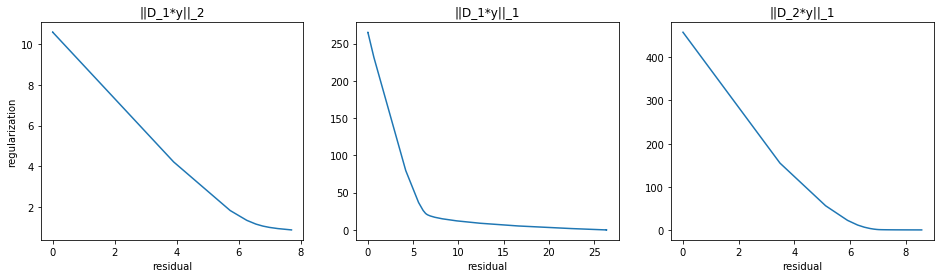

In [27]:
_, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].plot(res_d1_2, reg_d1_2)
axes[0].set_title('||D_1*y||_2')
axes[0].set_ylabel('regularization')
axes[0].set_xlabel('residual')
axes[1].plot(res_d1_1, reg_d1_1)
axes[1].set_title('||D_1*y||_1')
axes[1].set_xlabel('residual')
axes[2].plot(res_d2_1, reg_d2_1)
axes[2].set_title('||D_2*y||_1')
axes[2].set_xlabel('residual')

For each case we can see some point after which regularization is almost constant while residual is growing. That means that we get everything regularization could give us and there is no sense in increasing $\gamma$ after the corresponding value. 

Here is demonstration of how to get corresponding $\gamma$ for $\|D_1y\|_1$ case for the 3-rd signal: 

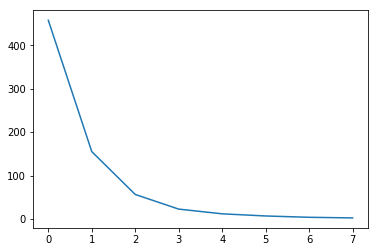

In [28]:
plt.plot(reg_d2_1[:8])

In [29]:
gamma[5]

0.05796393953384967

Here is plot of regularization part, we can see that after x=4 (the 5-th value) of $\gamma$ regularization is pretty constant. So we should choose the fifth value $\gamma = 0.06$

The same procedure can be done for each other signal and regularization type

$\|D_1y\|_1$, third signal

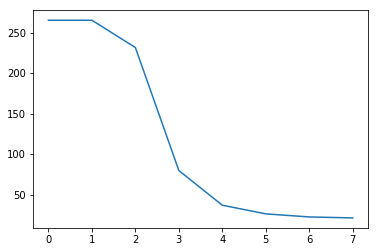

In [30]:
plt.plot(reg_d1_1[:8])

In [31]:
gamma[6]

0.08237387069571016

$\|D_1y\|_2$, third signal

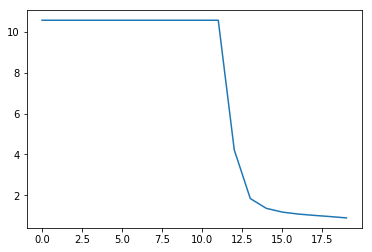

In [32]:
plt.plot(reg_d1_2)

In [33]:
gamma[15]

1.947483039908757

# Problem 2

$\mathcal{E} = \{x: (x - c)^TP^{-1}(x - c) \leq 1\}$

$(x - c)^TP^{-1}(x - c) \leq 1$ could be rewritten as $1 - (x - c)^TP^{-1}(x - c) \geq 1$ which is Schur-comlement of P for matrix
$\begin{bmatrix}1 & (x - c)^T\\(x - c) & P\end{bmatrix}$

$\Rightarrow$ we have a LMI: $\begin{bmatrix}1 & (a - c)^T\\(a - c) & P\end{bmatrix} \succeq 0$ (as $P \succeq 0$ for elipsoid)

# Problem 3

In [34]:
x = np.random.randn(10, 2)

I have an old version of cvxpy, where Semidef = variable()

In [39]:
cvx.__version__

'0.4.8'

In [35]:
A = cvx.Semidef(2)
b = cvx.Variable(2)

In [36]:
constraints = [cvx.power(cvx.norm2(A*x[i] + b), 2) <= 1 for i in range(10)]

In [37]:
p = cvx.Problem(cvx.Maximize(cvx.log_det(A)), constraints=constraints)
p.solve(solver=cvx.SCS)

-0.8988290644806437

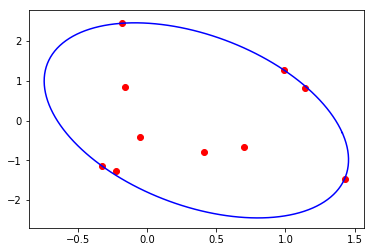

In [38]:
noangles = 300;
angles = np.linspace(0, 2*np.pi, noangles)
bx = np.concatenate((np.cos(angles)- b.value[0], np.sin(angles) - b.value[1]), axis=0)
ellipse  = np.array(np.linalg.solve(A.value, bx))
plt.figure()
plt.plot(ellipse[0].flatten(), ellipse[1].flatten(), c='b')
plt.scatter(x[:, 0], x[:, 1], c = 'r')
